<a href="https://colab.research.google.com/github/thegit-69/star-summit/blob/main/tradtional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


SIGNATURE-BASED INTRUSION DETECTION ANALYSIS
DATASET OVERVIEW
Total records: 9537
Features: session_id, network_packet_size, protocol_type, login_attempts, session_duration, encryption_used, ip_reputation_score, failed_logins, browser_type, unusual_time_access, attack_detected

Missing values:
encryption_used    1966
dtype: int64

Data statistics:
                      count        mean         std        min         25%  \
network_packet_size  9537.0  500.430639  198.379364  64.000000  365.000000   
login_attempts       9537.0    4.032086    1.963012   1.000000    3.000000   
session_duration     9537.0  792.745312  786.560144   0.500000  231.953006   
ip_reputation_score  9537.0    0.331338    0.177175   0.002497    0.191946   
failed_logins        9537.0    1.517773    1.033988   0.000000    1.000000   
unusual_time_access  9537.0    0.149942    0.357034   0.000000    0.000000   
attack_detected      9537.0    0.447101    0.497220   0.000000    0.000000   

                        

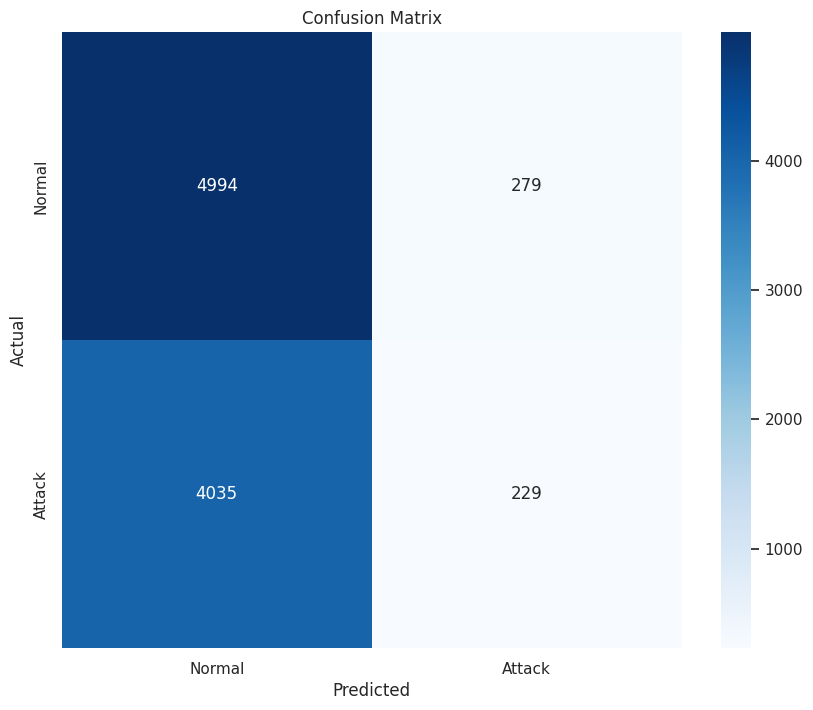

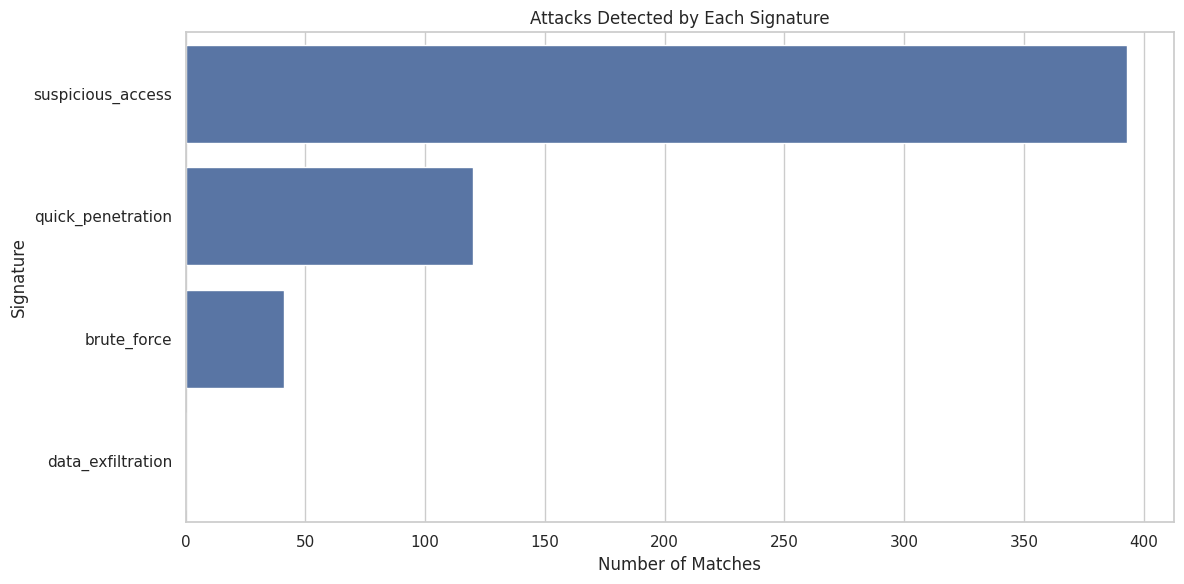

<ipython-input-3-727c02c3a422>:312: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_positives = real_attacks[self.detected_attacks]
<ipython-input-3-727c02c3a422>:313: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  false_negatives = real_attacks[~self.detected_attacks]
<ipython-input-3-727c02c3a422>:323: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(true_positives[feature], label='Detected Attacks', shade=True)
<ipython-input-3-727c02c3a422>:324: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(false_negatives[feature], label='Missed Attacks', shade=True)


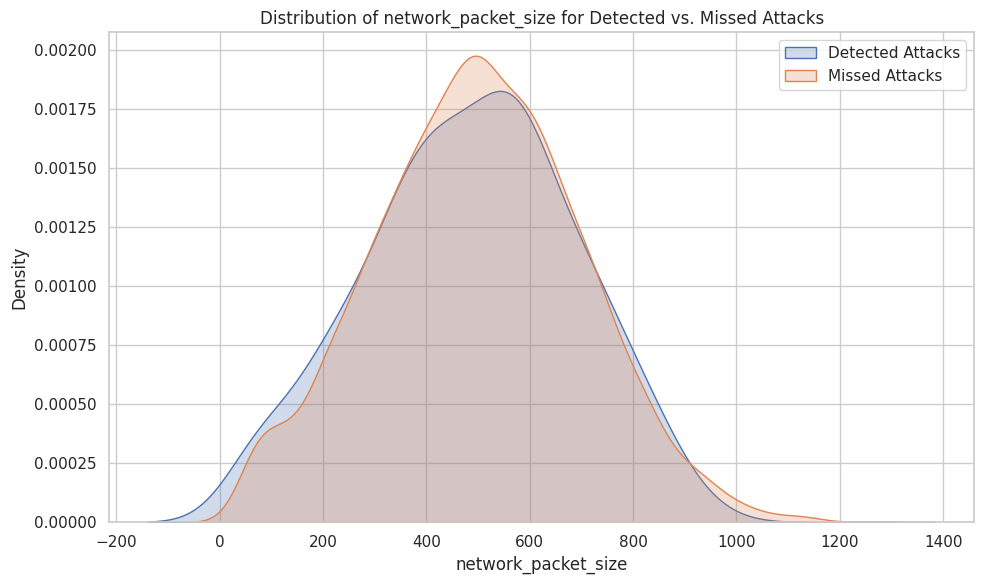

<ipython-input-3-727c02c3a422>:323: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(true_positives[feature], label='Detected Attacks', shade=True)
<ipython-input-3-727c02c3a422>:324: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(false_negatives[feature], label='Missed Attacks', shade=True)


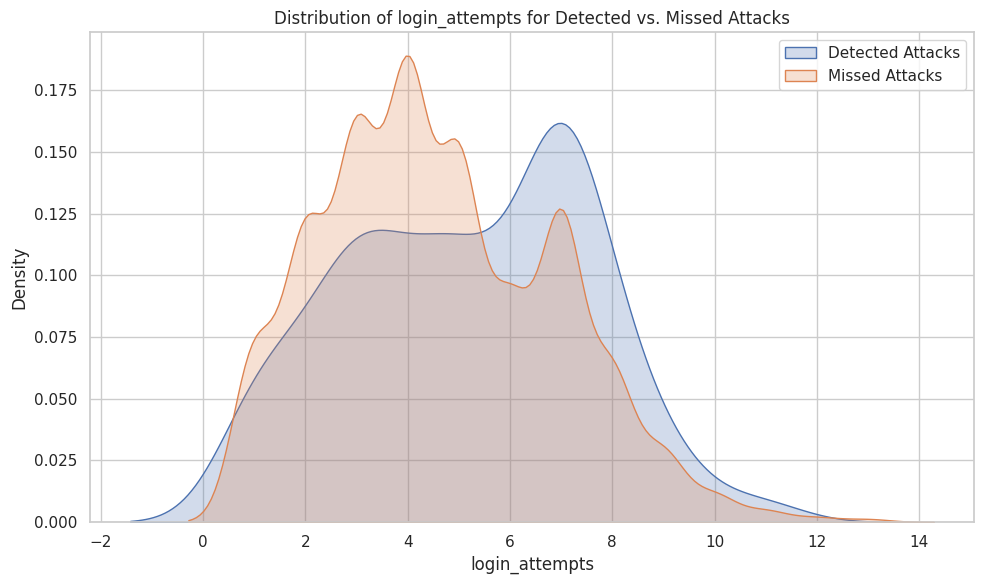

<ipython-input-3-727c02c3a422>:323: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(true_positives[feature], label='Detected Attacks', shade=True)
<ipython-input-3-727c02c3a422>:324: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(false_negatives[feature], label='Missed Attacks', shade=True)


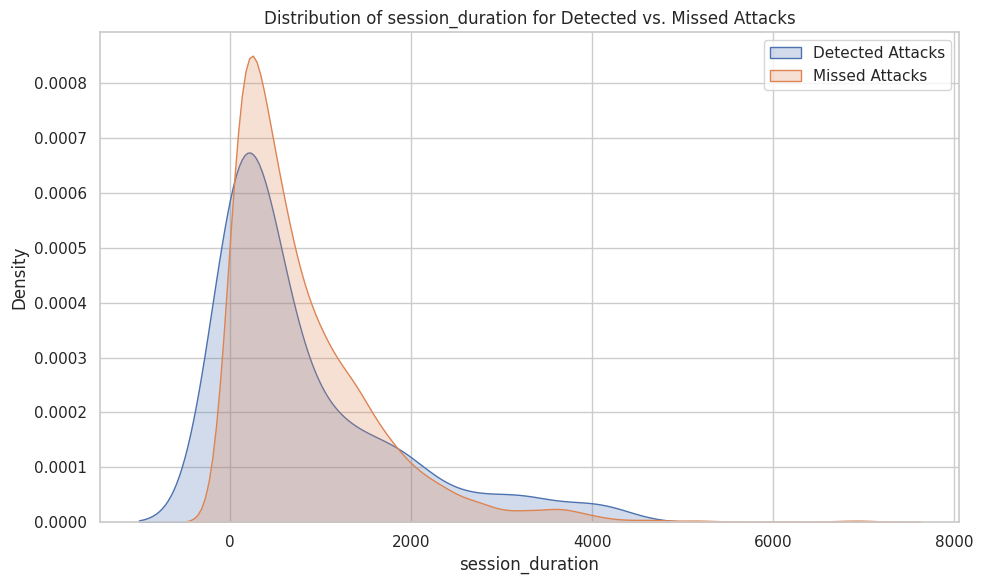

<ipython-input-3-727c02c3a422>:323: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(true_positives[feature], label='Detected Attacks', shade=True)
<ipython-input-3-727c02c3a422>:324: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(false_negatives[feature], label='Missed Attacks', shade=True)


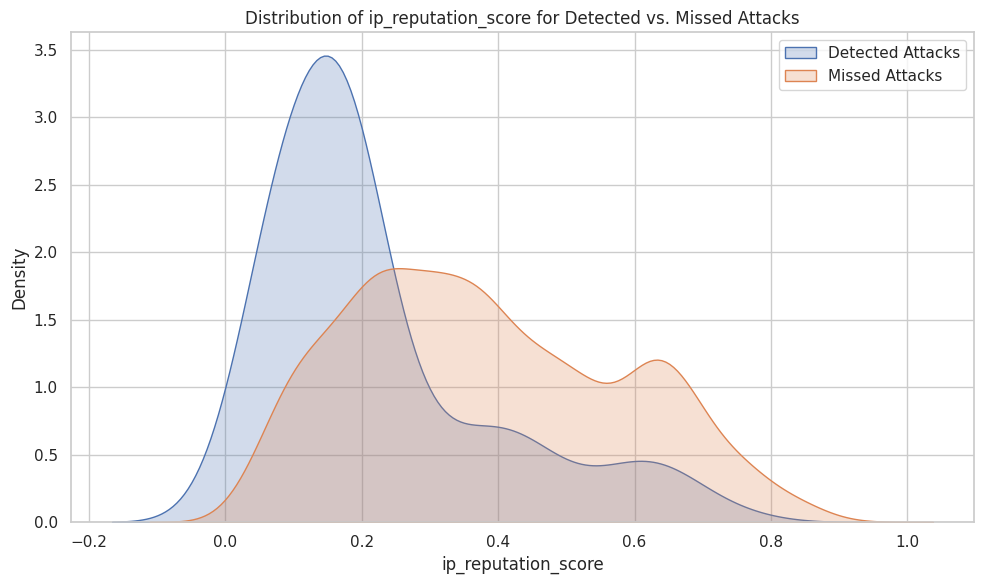

<ipython-input-3-727c02c3a422>:323: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(true_positives[feature], label='Detected Attacks', shade=True)
<ipython-input-3-727c02c3a422>:324: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(false_negatives[feature], label='Missed Attacks', shade=True)


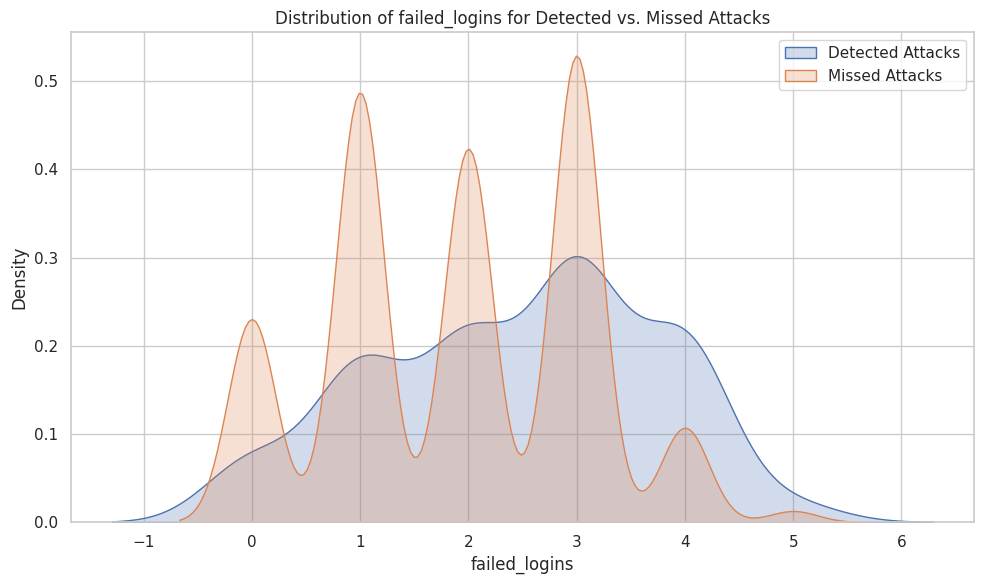

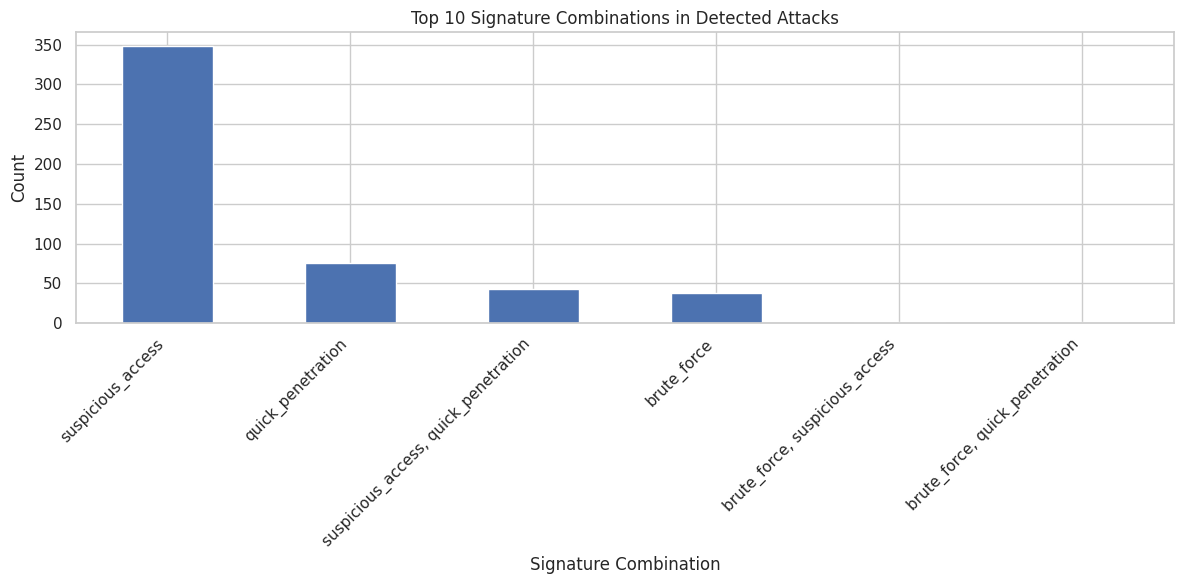


ANALYSIS SUMMARY
Total analysis time: 5.44 seconds
Records analyzed: 9537
Signatures defined: 4
Overall detection accuracy: 54.77%

Results saved to 'cybersecurity_detection_results.csv'


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

class SignatureBasedDetection:
    def __init__(self, file_path):
        """
        Initialize the signature-based detection system

        Args:
            file_path (str): "/content/cybersecurity_intrusion_data.csv"
        """
        self.file_path = file_path
        self.data = None
        self.detected_attacks = None
        self.signatures = {}
        self.results = {}

    def load_data(self):
        """Load and perform initial analysis of the dataset"""
        start_time = time.time()

        # Load the dataset
        self.data = pd.read_csv(self.file_path)

        # Data overview
        print("="*80)
        print("DATASET OVERVIEW")
        print("="*80)
        print(f"Total records: {len(self.data)}")
        print(f"Features: {', '.join(self.data.columns)}")

        # Check for missing values
        missing_values = self.data.isnull().sum()
        print("\nMissing values:")
        print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")

        # Data statistics
        print("\nData statistics:")
        print(self.data.describe().transpose())

        # Attack distribution
        attack_counts = self.data['attack_detected'].value_counts()
        print("\nAttack distribution:")
        print(f"Normal records: {attack_counts.get(0, 0)} ({attack_counts.get(0, 0)/len(self.data)*100:.2f}%)")
        print(f"Attack records: {attack_counts.get(1, 0)} ({attack_counts.get(1, 0)/len(self.data)*100:.2f}%)")

        load_time = time.time() - start_time
        print(f"\nData loaded and analyzed in {load_time:.2f} seconds")
        return self.data

    def define_signatures(self):
        """Define signatures for known attack patterns"""
        print("\n" + "="*80)
        print("DEFINING ATTACK SIGNATURES")
        print("="*80)

        # Analyze patterns in the data to create signatures
        # First, let's see patterns in actual attacks
        attack_data = self.data[self.data['attack_detected'] == 1]

        # Signature 1: High number of login attempts with failed logins
        login_threshold = np.percentile(attack_data['login_attempts'], 75)  # 75th percentile
        failed_threshold = np.percentile(attack_data['failed_logins'], 75)  # 75th percentile
        self.signatures['brute_force'] = {
            'description': 'Brute force attack signature',
            'conditions': {
                'login_attempts': ('>', login_threshold),
                'failed_logins': ('>', failed_threshold)
            }
        }

        # Signature 2: Unusual time access with poor IP reputation
        ip_rep_threshold = np.percentile(attack_data['ip_reputation_score'], 25)  # 25th percentile (lower is worse)
        self.signatures['suspicious_access'] = {
            'description': 'Suspicious access pattern',
            'conditions': {
                'unusual_time_access': ('==', 1),
                'ip_reputation_score': ('<', ip_rep_threshold)
            }
        }

        # Signature 3: Abnormal network packet size with no encryption
        packet_size_threshold = np.percentile(attack_data['network_packet_size'], 90)  # 90th percentile
        self.signatures['data_exfiltration'] = {
            'description': 'Potential data exfiltration',
            'conditions': {
                'network_packet_size': ('>', packet_size_threshold),
                'encryption_used': ('==', 'none')  # Assuming 'none' is a value in the dataset
            }
        }

        # Signature 4: Short session with failed login and unusual time
        session_min_threshold = np.percentile(attack_data['session_duration'], 10)  # 10th percentile
        self.signatures['quick_penetration'] = {
            'description': 'Quick penetration attempt',
            'conditions': {
                'session_duration': ('<', session_min_threshold),
                'failed_logins': ('>', 0),
                'unusual_time_access': ('==', 1)
            }
        }

        # Print the defined signatures
        for name, signature in self.signatures.items():
            print(f"\nSignature: {name}")
            print(f"Description: {signature['description']}")
            print("Conditions:")
            for feature, (operator, threshold) in signature['conditions'].items():
                print(f"  - {feature} {operator} {threshold}")

        return self.signatures

    def match_signature(self, record, signature):
        """
        Check if a record matches a signature

        Args:
            record (Series): A single record from the dataset
            signature (dict): The signature definition to match against

        Returns:
            bool: Whether the record matches the signature
        """
        for feature, (operator, threshold) in signature['conditions'].items():
            # Skip if feature not in record (shouldn't happen with clean data)
            if feature not in record:
                return False

            # Handle categorical features
            if feature == 'encryption_used' and operator == '==':
                if record[feature] != threshold:
                    return False
            # Numeric comparisons
            elif operator == '>':
                if record[feature] <= threshold:
                    return False
            elif operator == '<':
                if record[feature] >= threshold:
                    return False
            elif operator == '==':
                if record[feature] != threshold:
                    return False

        # If all conditions passed, it's a match
        return True

    def detect_attacks(self):
        """
        Apply signature-based detection to identify attacks

        Returns:
            Series: Boolean series indicating detected attacks
        """
        print("\n" + "="*80)
        print("PERFORMING SIGNATURE-BASED DETECTION")
        print("="*80)

        start_time = time.time()

        # Initialize a column for storing which signature(s) matched
        self.data['detected_signatures'] = ''

        # Apply each signature to the dataset
        for name, signature in self.signatures.items():
            match_vector = np.zeros(len(self.data), dtype=bool)

            # Apply the signature to each record
            for i, (_, record) in enumerate(self.data.iterrows()):
                if self.match_signature(record, signature):
                    match_vector[i] = True
                    # Add signature name to the detected_signatures column
                    if self.data.loc[i, 'detected_signatures']:
                        self.data.loc[i, 'detected_signatures'] += f", {name}"
                    else:
                        self.data.loc[i, 'detected_signatures'] = name

            # Store the matches in the results
            self.results[name] = {
                'matches': match_vector.sum(),
                'match_percentage': match_vector.mean() * 100
            }

        # Combine all signature detections
        self.detected_attacks = self.data['detected_signatures'] != ''

        # Count signature overlaps
        signature_overlap = self.data[self.detected_attacks]['detected_signatures'].apply(
            lambda x: len(x.split(', '))
        ).value_counts().sort_index()

        # Performance metrics
        detection_time = time.time() - start_time
        total_detected = self.detected_attacks.sum()
        detection_rate = total_detected / len(self.data) * 100

        # Print detection results
        print(f"Detection completed in {detection_time:.2f} seconds")
        print(f"\nTotal attacks detected: {total_detected} ({detection_rate:.2f}%)")

        print("\nSignature detection results:")
        for name, result in self.results.items():
            print(f"  - {name}: {result['matches']} matches ({result['match_percentage']:.2f}%)")

        print("\nSignature overlap (number of signatures matching a record):")
        for count, frequency in signature_overlap.items():
            print(f"  - {count} signature(s): {frequency} records")

        return self.detected_attacks

    def evaluate_performance(self):
        """
        Evaluate the performance of the signature-based detection against ground truth

        Returns:
            dict: Performance metrics
        """
        print("\n" + "="*80)
        print("EVALUATION OF DETECTION PERFORMANCE")
        print("="*80)

        if 'attack_detected' not in self.data.columns:
            print("Ground truth 'attack_detected' column not found. Cannot evaluate performance.")
            return {}

        # Get ground truth and predictions
        y_true = self.data['attack_detected']
        y_pred = self.detected_attacks.astype(int)

        # Calculate performance metrics
        accuracy = accuracy_score(y_true, y_pred) * 100
        precision = precision_score(y_true, y_pred) * 100
        recall = recall_score(y_true, y_pred) * 100
        f1 = f1_score(y_true, y_pred) * 100

        # Confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()

        # Store performance metrics
        performance = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'true_negatives': tn,
            'false_positives': fp,
            'false_negatives': fn,
            'true_positives': tp
        }

        # Print performance metrics
        print(f"Detection Accuracy: {accuracy:.2f}%")
        print(f"Precision: {precision:.2f}%")
        print(f"Recall (Detection Rate): {recall:.2f}%")
        print(f"F1 Score: {f1:.2f}%")

        print("\nConfusion Matrix:")
        print(f"True Negatives: {tn}")
        print(f"False Positives: {fp}")
        print(f"False Negatives: {fn}")
        print(f"True Positives: {tp}")

        # Show true positive and false positive rates
        tpr = tp / (tp + fn) * 100  # Sensitivity or True Positive Rate
        fpr = fp / (fp + tn) * 100  # False Positive Rate
        tnr = tn / (tn + fp) * 100  # Specificity or True Negative Rate

        print(f"\nTrue Positive Rate: {tpr:.2f}%")
        print(f"False Positive Rate: {fpr:.2f}%")
        print(f"True Negative Rate (Specificity): {tnr:.2f}%")

        return performance

    def visualize_results(self):
        """Create visualizations of the detection results"""
        print("\n" + "="*80)
        print("VISUALIZING DETECTION RESULTS")
        print("="*80)

        # Set up the style
        sns.set(style="whitegrid")

        # 1. Confusion Matrix Heatmap
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(self.data['attack_detected'], self.detected_attacks.astype(int))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Normal", "Attack"],
                    yticklabels=["Normal", "Attack"])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

        # 2. Signature Detection Comparison
        plt.figure(figsize=(12, 6))
        signature_results = {name: result['matches'] for name, result in self.results.items()}
        signature_df = pd.DataFrame(list(signature_results.items()), columns=['Signature', 'Matches'])
        signature_df = signature_df.sort_values('Matches', ascending=False)

        sns.barplot(x='Matches', y='Signature', data=signature_df)
        plt.title('Attacks Detected by Each Signature')
        plt.xlabel('Number of Matches')
        plt.tight_layout()
        plt.show()

        # 3. Feature distribution for detected vs. undetected attacks
        real_attacks = self.data[self.data['attack_detected'] == 1]
        true_positives = real_attacks[self.detected_attacks]
        false_negatives = real_attacks[~self.detected_attacks]

        # Select important numeric features
        numeric_features = ['network_packet_size', 'login_attempts', 'session_duration',
                           'ip_reputation_score', 'failed_logins']

        for feature in numeric_features:
            plt.figure(figsize=(10, 6))

            # Create a kernel density estimate plot
            sns.kdeplot(true_positives[feature], label='Detected Attacks', shade=True)
            sns.kdeplot(false_negatives[feature], label='Missed Attacks', shade=True)

            plt.title(f'Distribution of {feature} for Detected vs. Missed Attacks')
            plt.xlabel(feature)
            plt.ylabel('Density')
            plt.legend()
            plt.tight_layout()
            plt.show()

        # 4. Detection accuracy by signature combinations
        if self.detected_attacks.sum() > 0:
            signature_combinations = self.data[self.detected_attacks]['detected_signatures'].value_counts()
            top_combinations = signature_combinations.head(10)

            plt.figure(figsize=(12, 6))
            top_combinations.plot(kind='bar')
            plt.title('Top 10 Signature Combinations in Detected Attacks')
            plt.xlabel('Signature Combination')
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

    def run_analysis(self):
        """Run the complete signature-based detection analysis pipeline"""
        overall_start = time.time()

        print("\n" + "="*80)
        print("SIGNATURE-BASED INTRUSION DETECTION ANALYSIS")
        print("="*80)

        # Execute the analysis pipeline
        self.load_data()
        self.define_signatures()
        self.detect_attacks()
        performance = self.evaluate_performance()
        self.visualize_results()

        # Generate summary report
        overall_time = time.time() - overall_start

        print("\n" + "="*80)
        print("ANALYSIS SUMMARY")
        print("="*80)
        print(f"Total analysis time: {overall_time:.2f} seconds")
        print(f"Records analyzed: {len(self.data)}")
        print(f"Signatures defined: {len(self.signatures)}")
        print(f"Overall detection accuracy: {performance.get('accuracy', 'N/A'):.2f}%")

        # Return the enriched dataset
        return self.data


# Main execution
if __name__ == "__main__":
    # Initialize the detection system
    detector = SignatureBasedDetection('cybersecurity_intrusion_data.csv')

    # Run the complete analysis
    results = detector.run_analysis()

    # Optional: Save the results with signature information
    results.to_csv('cybersecurity_detection_results.csv', index=False)
    print("\nResults saved to 'cybersecurity_detection_results.csv'")